In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("C:\\Users\\visha\\Downloads\\BostonHousing.csv")

In [3]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [5]:
df.shape

(506, 14)

In [6]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [7]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
y = df['medv']

In [9]:
selected_columns = ['ZN','INDUS',"NOX","RM","DIS","RAD","TAX","PTRATIO","LSTAT","AGE"]

In [10]:
selected_columns[0].lower()

'zn'

In [11]:
new_lst = []
for i in selected_columns:
    new_lst.append(i.lower())

In [12]:
new_lst

['zn', 'indus', 'nox', 'rm', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'age']

In [13]:
x = df[new_lst]

In [14]:
len(x)

506

In [15]:
x['zn']

0      18.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
501     0.0
502     0.0
503     0.0
504     0.0
505     0.0
Name: zn, Length: 506, dtype: float64

In [16]:
x.columns

Index(['zn', 'indus', 'nox', 'rm', 'dis', 'rad', 'tax', 'ptratio', 'lstat',
       'age'],
      dtype='object')

In [17]:
x

,zn,indus,nox,rm,dis,rad,tax,ptratio,lstat,age
0,18.0,2.31,0.538,6.575,4.0900,1,296,15.3,4.98,65.2
1,0.0,7.07,0.469,6.421,4.9671,2,242,17.8,9.14,78.9
2,0.0,7.07,0.469,7.185,4.9671,2,242,17.8,4.03,61.1
3,0.0,2.18,0.458,6.998,6.0622,3,222,18.7,2.94,45.8
4,0.0,2.18,0.458,7.147,6.0622,3,222,18.7,5.33,54.2
...,...,...,...,...,...,...,...,...,...,...
501,0.0,11.93,0.573,6.593,2.4786,1,273,21.0,9.67,69.1
502,0.0,11.93,0.573,6.120,2.2875,1,273,21.0,9.08,76.7
503,0.0,11.93,0.573,6.976,2.1675,1,273,21.0,5.64,91.0
504,0.0,11.93,0.573,6.794,2.3889,1,273,21.0,6.48,89.3


In [18]:
df['rad'].value_counts()

rad
24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: count, dtype: int64

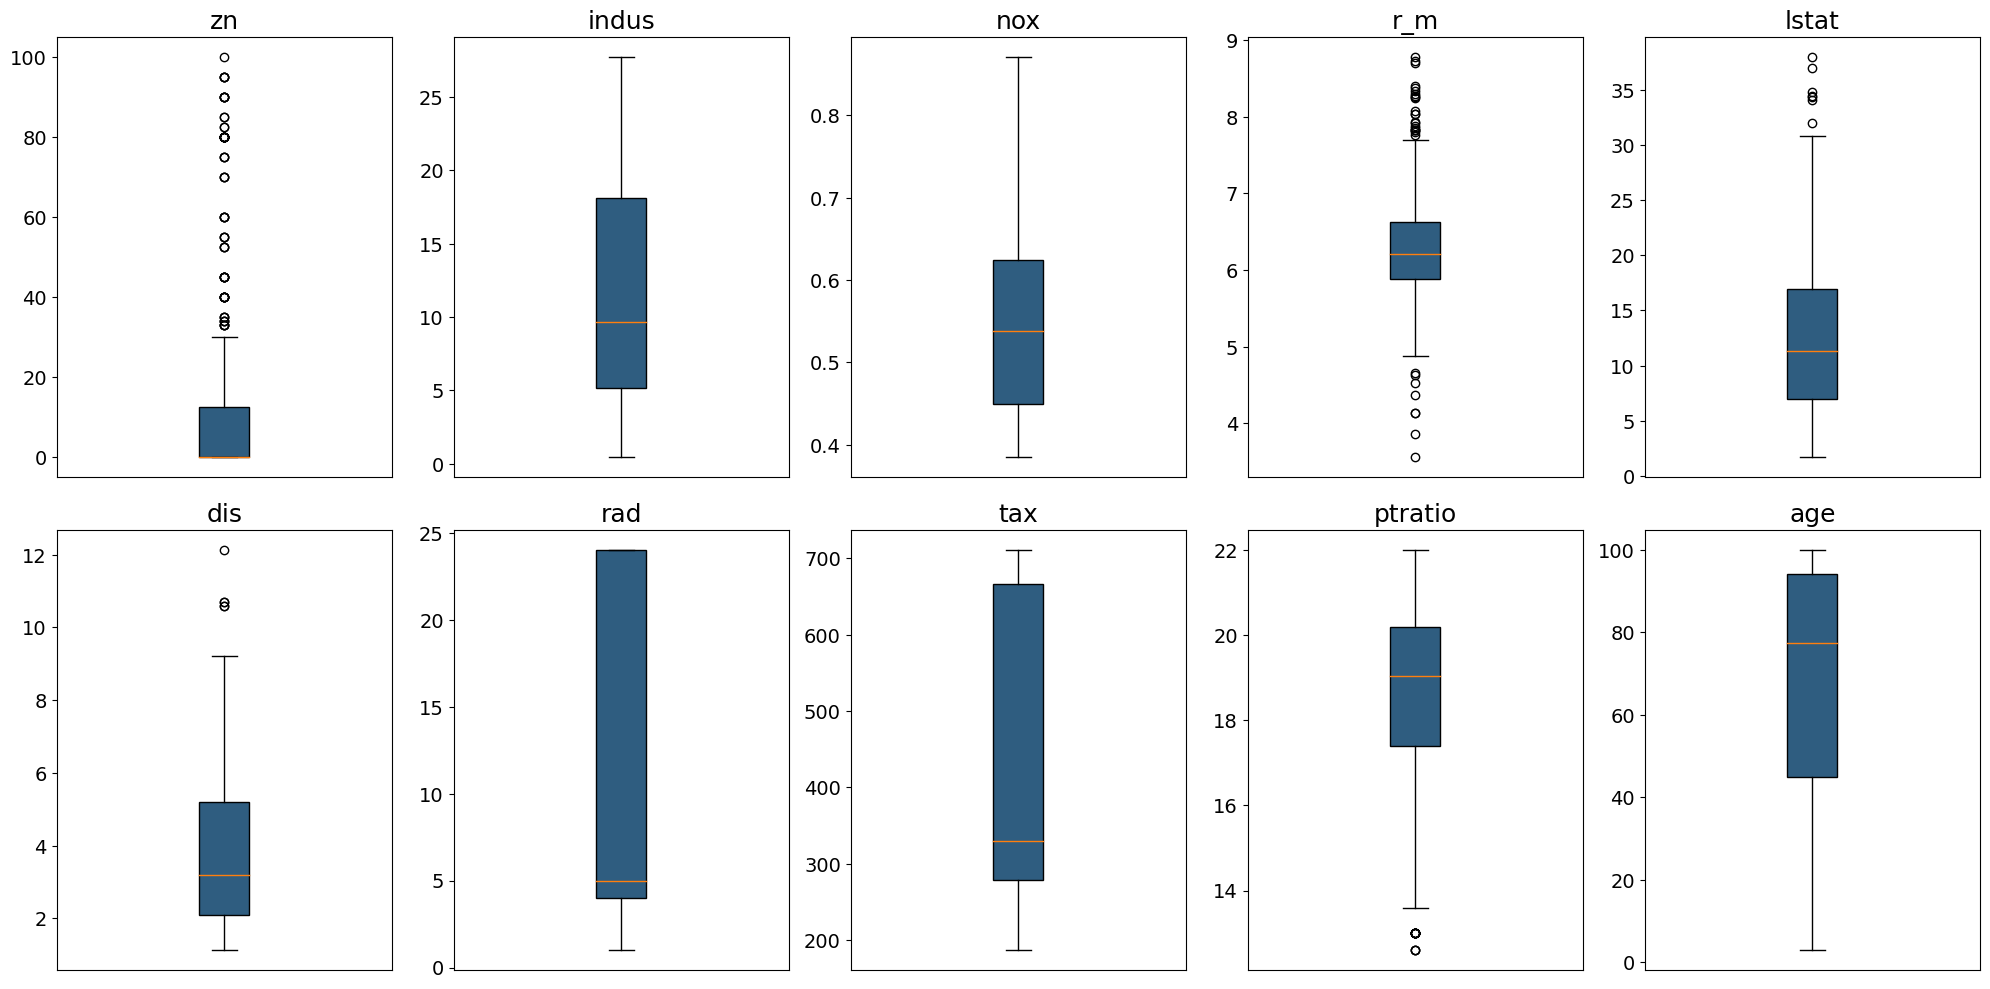

In [19]:
fig,ax = plt.subplots(2,5,figsize=(20,10))

ax[0,0].boxplot(x['zn'],patch_artist=True,boxprops={"facecolor":"#2F5D80"})
ax[0,0].set_title('zn',fontsize=18)
ax[0,0].tick_params(axis='y', labelsize=14)
ax[0,0].set_xticks([])

ax[0,1].boxplot(x['indus'],patch_artist=True,boxprops={"facecolor":"#2F5D80"})
ax[0,1].set_title('indus',fontsize=18)
ax[0,1].tick_params(axis='y', labelsize=14)
ax[0,1].set_xticks([])

ax[0,2].boxplot(x['nox'],patch_artist=True,boxprops={"facecolor":"#2F5D80"})
ax[0,2].set_title('nox',fontsize=18)
ax[0,2].tick_params(axis='y', labelsize=14)
ax[0,2].set_xticks([])

ax[0,3].boxplot(x['rm'],patch_artist=True,boxprops={"facecolor":"#2F5D80"})
ax[0,3].set_title('r_m',fontsize=18)
ax[0,3].tick_params(axis='y', labelsize=14)
ax[0,3].set_xticks([])

ax[0,4].boxplot(x['lstat'],patch_artist=True,boxprops={"facecolor":"#2F5D80"})
ax[0,4].set_title('lstat',fontsize=18)
ax[0,4].tick_params(axis='y', labelsize=14)
ax[0,4].set_xticks([])

ax[1,0].boxplot(x['dis'],patch_artist=True,boxprops={"facecolor":"#2F5D80"})
ax[1,0].set_title('dis',fontsize=18)
ax[1,0].tick_params(axis='y', labelsize=14)
ax[1,0].set_xticks([])

ax[1,1].boxplot(x['rad'],patch_artist=True,boxprops={"facecolor":"#2F5D80"})
ax[1,1].set_title('rad',fontsize=18)
ax[1,1].tick_params(axis='y', labelsize=14)
ax[1,1].set_xticks([])

ax[1,2].boxplot(x['tax'],patch_artist=True,boxprops={"facecolor":"#2F5D80"})
ax[1,2].set_title('tax',fontsize=18)
ax[1,2].tick_params(axis='y', labelsize=14)
ax[1,2].set_xticks([]) 

ax[1,3].boxplot(x['ptratio'],patch_artist=True,boxprops={"facecolor":"#2F5D80"})
ax[1,3].set_title('ptratio',fontsize=18)
ax[1,3].tick_params(axis='y', labelsize=14)
ax[1,3].set_xticks([]) 

ax[1,4].boxplot(x['age'],patch_artist=True,boxprops={"facecolor":"#2F5D80"})
ax[1,4].set_title('age',fontsize=18)
ax[1,4].tick_params(axis='y', labelsize=14)
ax[1,4].set_xticks([]) 

plt.tight_layout()
plt.show()

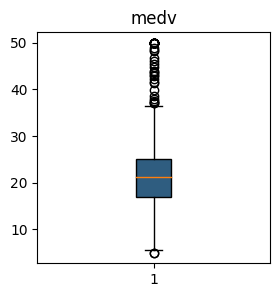

In [20]:
plt.figure(figsize=(3,3))
plt.boxplot(y,patch_artist=True,boxprops={"facecolor":"#2F5D80"})
plt.title("medv")
plt.show()

In [21]:
x.head()

,zn,indus,nox,rm,dis,rad,tax,ptratio,lstat,age
0,18.0,2.31,0.538,6.575,4.0900,1,296,15.3,4.98,65.2
1,0.0,7.07,0.469,6.421,4.9671,2,242,17.8,9.14,78.9
2,0.0,7.07,0.469,7.185,4.9671,2,242,17.8,4.03,61.1
3,0.0,2.18,0.458,6.998,6.0622,3,222,18.7,2.94,45.8
4,0.0,2.18,0.458,7.147,6.0622,3,222,18.7,5.33,54.2


In [22]:
x.columns

Index(['zn', 'indus', 'nox', 'rm', 'dis', 'rad', 'tax', 'ptratio', 'lstat',
       'age'],
      dtype='object')

In [23]:
handling_outlier = x[['zn','rm','lstat','dis','ptratio']]

In [24]:
q1 = handling_outlier.quantile(0.25)
q3 = handling_outlier.quantile(0.75)

iqr = q3-q1

upper_limit = q3+1.5*iqr
lower_limit = q1-1.5*iqr

print(upper_limit,lower_limit)


zn         31.2500
rm          7.7305
lstat      31.9625
dis         9.8208
ptratio    24.4000
dtype: float64 zn        -18.7500
rm          4.7785
lstat      -8.0575
dis        -2.5322
ptratio    13.2000
dtype: float64


In [25]:
x.columns

Index(['zn', 'indus', 'nox', 'rm', 'dis', 'rad', 'tax', 'ptratio', 'lstat',
       'age'],
      dtype='object')

In [26]:
x['zn'] = np.where(x['zn']>upper_limit[0],upper_limit[0],x['zn'])

C:\Users\visha\AppData\Local\Temp\ipykernel_21180\3663482560.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x['zn'] = np.where(x['zn']>upper_limit[0],upper_limit[0],x['zn'])
C:\Users\visha\AppData\Local\Temp\ipykernel_21180\3663482560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['zn'] = np.where(x['zn']>upper_limit[0],upper_limit[0],x['zn'])


In [27]:
x['rm'] = np.where(x['rm']>upper_limit[1],upper_limit[1],np.where(x['rm']<lower_limit[1],lower_limit[1],x['rm']))

C:\Users\visha\AppData\Local\Temp\ipykernel_21180\3561733881.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x['rm'] = np.where(x['rm']>upper_limit[1],upper_limit[1],np.where(x['rm']<lower_limit[1],lower_limit[1],x['rm']))
C:\Users\visha\AppData\Local\Temp\ipykernel_21180\3561733881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['rm'] = np.where(x['rm']>upper_limit[1],upper_limit[1],np.where(x['rm']<lower_limit[1],lower_limit[1],x['rm']))


In [28]:
upper_limit

zn         31.2500
rm          7.7305
lstat      31.9625
dis         9.8208
ptratio    24.4000
dtype: float64

In [29]:
x['lstat'] = np.where(x['lstat']>upper_limit[2],upper_limit[2],x['lstat'])

C:\Users\visha\AppData\Local\Temp\ipykernel_21180\1410606799.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x['lstat'] = np.where(x['lstat']>upper_limit[2],upper_limit[2],x['lstat'])
C:\Users\visha\AppData\Local\Temp\ipykernel_21180\1410606799.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['lstat'] = np.where(x['lstat']>upper_limit[2],upper_limit[2],x['lstat'])


In [30]:
x['dis'] = np.where(x['dis']>upper_limit[3],upper_limit[3],x['dis'])

C:\Users\visha\AppData\Local\Temp\ipykernel_21180\2019484961.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x['dis'] = np.where(x['dis']>upper_limit[3],upper_limit[3],x['dis'])
C:\Users\visha\AppData\Local\Temp\ipykernel_21180\2019484961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['dis'] = np.where(x['dis']>upper_limit[3],upper_limit[3],x['dis'])


In [31]:
x['ptratio'] = np.where(x['ptratio']<lower_limit[4],lower_limit[4],x['ptratio'])

C:\Users\visha\AppData\Local\Temp\ipykernel_21180\2044051083.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x['ptratio'] = np.where(x['ptratio']<lower_limit[4],lower_limit[4],x['ptratio'])
C:\Users\visha\AppData\Local\Temp\ipykernel_21180\2044051083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['ptratio'] = np.where(x['ptratio']<lower_limit[4],lower_limit[4],x['ptratio'])


In [32]:
yq1 = y.quantile(0.25)
yq3 = y.quantile(0.75)

y_iqr = yq3-yq1

y_upper_limit = yq3+1.5*y_iqr
y_lower_limit = yq1-1.5*y_iqr

In [33]:
y = np.where(y>y_upper_limit,y_upper_limit,np.where(y<y_lower_limit,y_lower_limit,y))

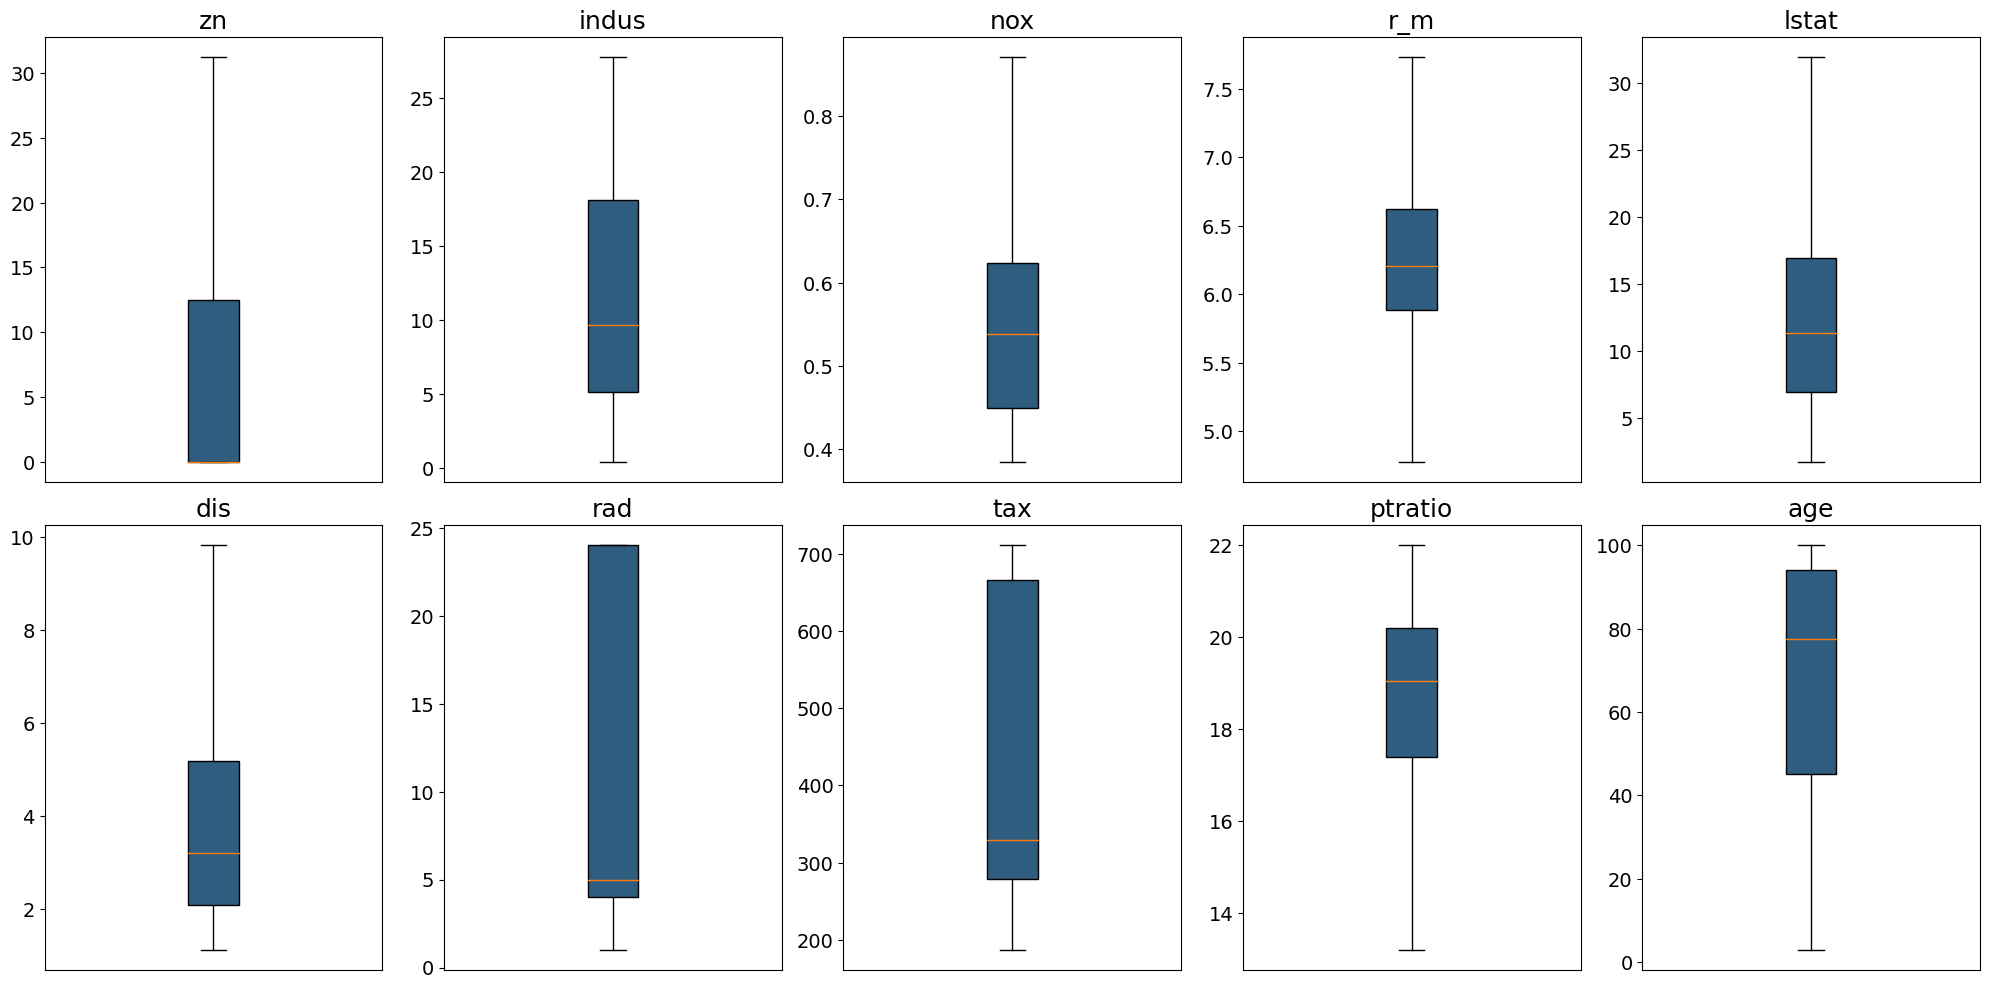

In [34]:
fig,ax = plt.subplots(2,5,figsize=(20,10))

ax[0,0].boxplot(x['zn'],patch_artist=True,boxprops={"facecolor":"#2F5D80"})
ax[0,0].set_title('zn',fontsize=18)
ax[0,0].tick_params(axis='y', labelsize=14)
ax[0,0].set_xticks([])

ax[0,1].boxplot(x['indus'],patch_artist=True,boxprops={"facecolor":"#2F5D80"})
ax[0,1].set_title('indus',fontsize=18)
ax[0,1].tick_params(axis='y', labelsize=14)
ax[0,1].set_xticks([])

ax[0,2].boxplot(x['nox'],patch_artist=True,boxprops={"facecolor":"#2F5D80"})
ax[0,2].set_title('nox',fontsize=18)
ax[0,2].tick_params(axis='y', labelsize=14)
ax[0,2].set_xticks([])

ax[0,3].boxplot(x['rm'],patch_artist=True,boxprops={"facecolor":"#2F5D80"})
ax[0,3].set_title('r_m',fontsize=18)
ax[0,3].tick_params(axis='y', labelsize=14)
ax[0,3].set_xticks([])

ax[0,4].boxplot(x['lstat'],patch_artist=True,boxprops={"facecolor":"#2F5D80"})
ax[0,4].set_title('lstat',fontsize=18)
ax[0,4].tick_params(axis='y', labelsize=14)
ax[0,4].set_xticks([])

ax[1,0].boxplot(x['dis'],patch_artist=True,boxprops={"facecolor":"#2F5D80"})
ax[1,0].set_title('dis',fontsize=18)
ax[1,0].tick_params(axis='y', labelsize=14)
ax[1,0].set_xticks([])

ax[1,1].boxplot(x['rad'],patch_artist=True,boxprops={"facecolor":"#2F5D80"})
ax[1,1].set_title('rad',fontsize=18)
ax[1,1].tick_params(axis='y', labelsize=14)
ax[1,1].set_xticks([])

ax[1,2].boxplot(x['tax'],patch_artist=True,boxprops={"facecolor":"#2F5D80"})
ax[1,2].set_title('tax',fontsize=18)
ax[1,2].tick_params(axis='y', labelsize=14)
ax[1,2].set_xticks([]) 

ax[1,3].boxplot(x['ptratio'],patch_artist=True,boxprops={"facecolor":"#2F5D80"})
ax[1,3].set_title('ptratio',fontsize=18)
ax[1,3].tick_params(axis='y', labelsize=14)
ax[1,3].set_xticks([]) 

ax[1,4].boxplot(x['age'],patch_artist=True,boxprops={"facecolor":"#2F5D80"})
ax[1,4].set_title('age',fontsize=18)
ax[1,4].tick_params(axis='y', labelsize=14)
ax[1,4].set_xticks([]) 

plt.tight_layout()
plt.show()

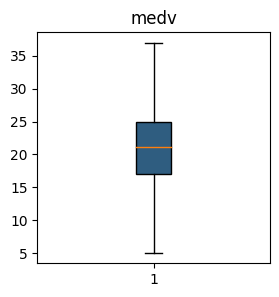

In [35]:
plt.figure(figsize=(3,3))
plt.boxplot(y,patch_artist=True,boxprops={"facecolor":"#2F5D80"})
plt.title("medv")
plt.show()

C:\Users\visha\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\visha\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\visha\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\visha\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

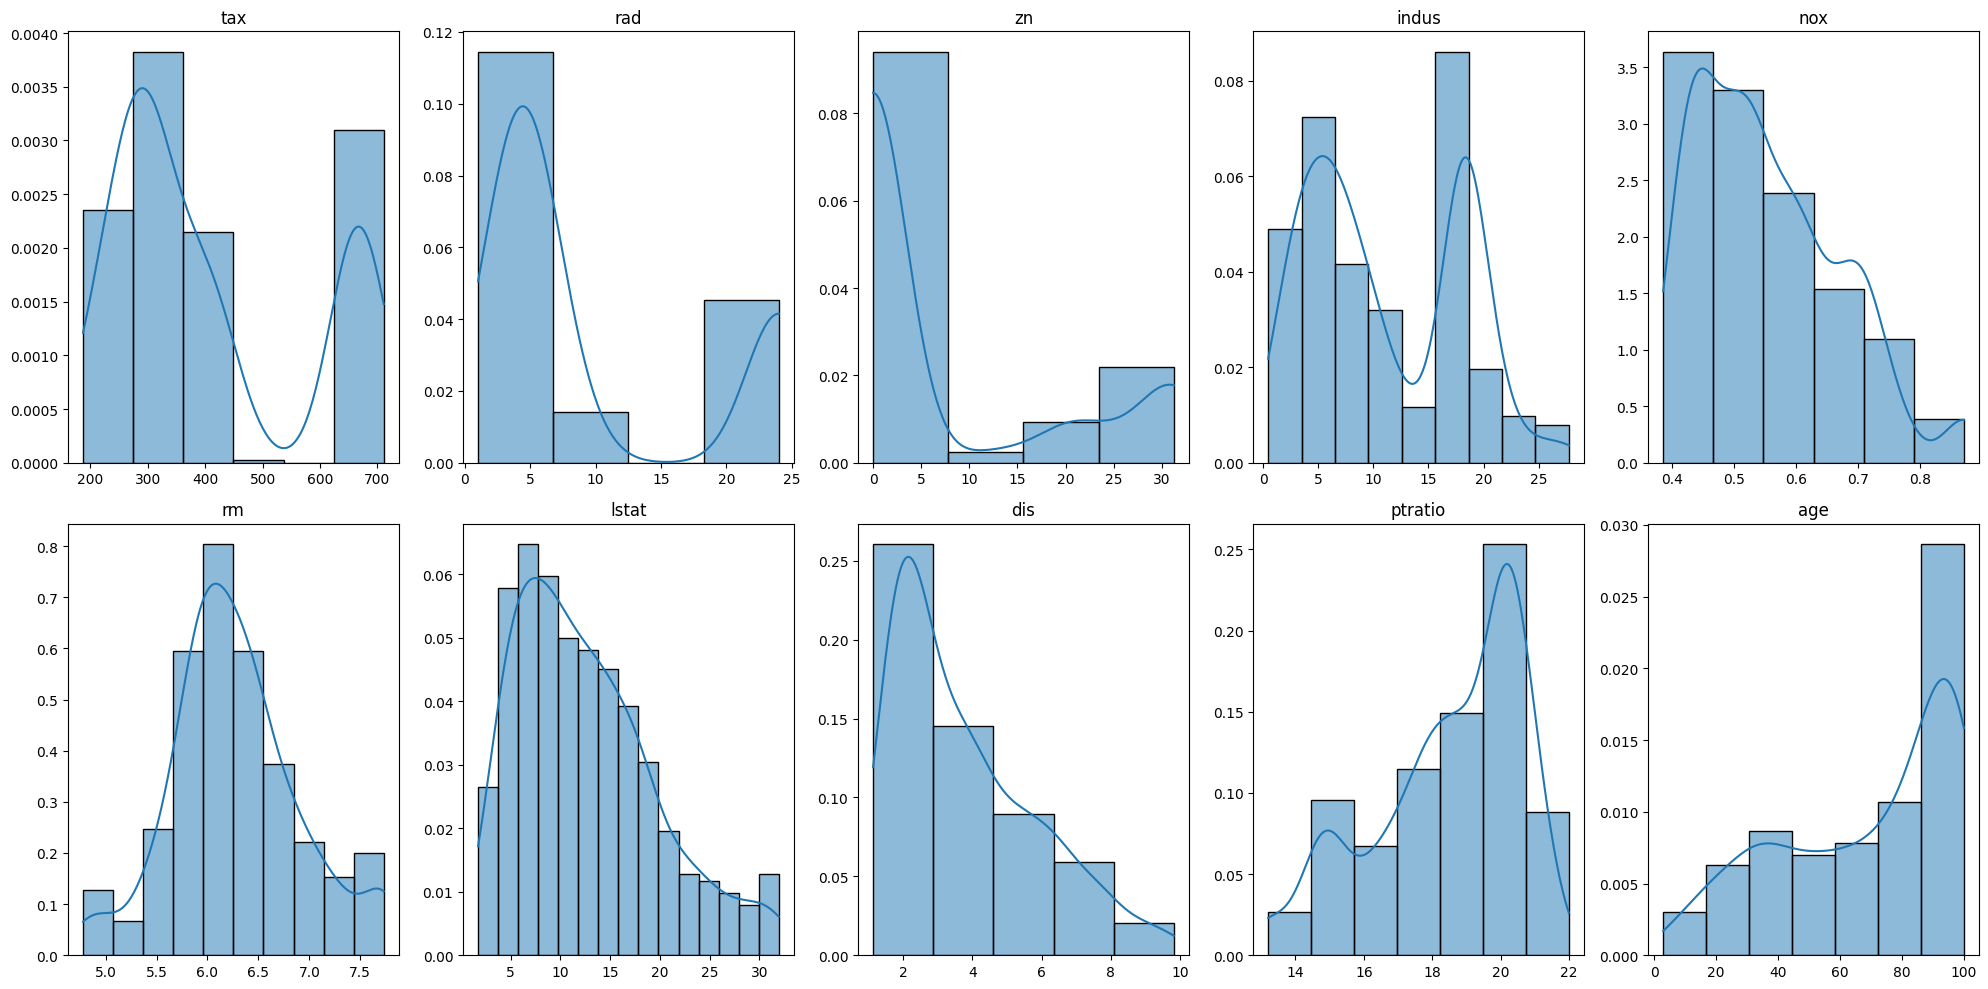

In [36]:
fig,ax = plt.subplots(2,5,figsize=(20,10))

sns.histplot(x['tax'],bins=6,kde=True,ax=ax[0,0],stat='density')
ax[0,0].set_ylabel("")
ax[0,0].set_xlabel("")
ax[0,0].set_title("tax")

sns.histplot(x['rad'],kde=True,ax=ax[0,1],bins=4,stat='density')
ax[0,1].set_ylabel("")
ax[0,1].set_xlabel("")
ax[0,1].set_title("rad")

sns.histplot(x['zn'],kde=True,stat='density',bins=4,ax=ax[0,2])
ax[0,2].set_ylabel("")
ax[0,2].set_xlabel("")
ax[0,2].set_title("zn")

sns.histplot(x['indus'],kde=True,bins=9,stat='density',ax=ax[0,3])
ax[0,3].set_ylabel("")
ax[0,3].set_xlabel("")
ax[0,3].set_title("indus")

sns.histplot(x['nox'],kde=True,bins=6,stat='density',ax=ax[0,4])
ax[0,4].set_ylabel("")
ax[0,4].set_xlabel("")
ax[0,4].set_title("nox")

sns.histplot(x['rm'],kde=True,bins=10,stat='density',ax=ax[1,0])
ax[1,0].set_ylabel("")
ax[1,0].set_xlabel("")
ax[1,0].set_title("rm")

sns.histplot(x['lstat'],kde=True,bins=15,stat='density',ax=ax[1,1])
ax[1,1].set_ylabel("")
ax[1,1].set_xlabel("")
ax[1,1].set_title("lstat")

sns.histplot(x['dis'],kde=True,bins=5,stat='density',ax=ax[1,2])
ax[1,2].set_ylabel("")
ax[1,2].set_xlabel("")
ax[1,2].set_title("dis")

sns.histplot(x['ptratio'],kde=True,stat='density',bins=7,ax=ax[1,3])
ax[1,3].set_ylabel("")
ax[1,3].set_xlabel("")
ax[1,3].set_title("ptratio")

sns.histplot(x['age'],kde=True,stat='density',bins=7,ax=ax[1,4])
ax[1,4].set_ylabel("")
ax[1,4].set_xlabel("")
ax[1,4].set_title("age")

plt.tight_layout()
plt.show()

C:\Users\visha\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\visha\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


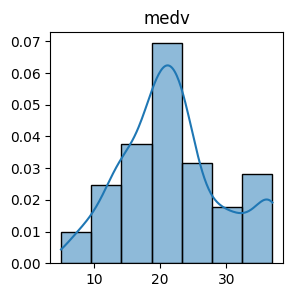

In [37]:
plt.figure(figsize=(3,3))
sns.histplot(y,kde=True,stat='density',bins=7)
plt.title("medv")
plt.ylabel("")
plt.show()

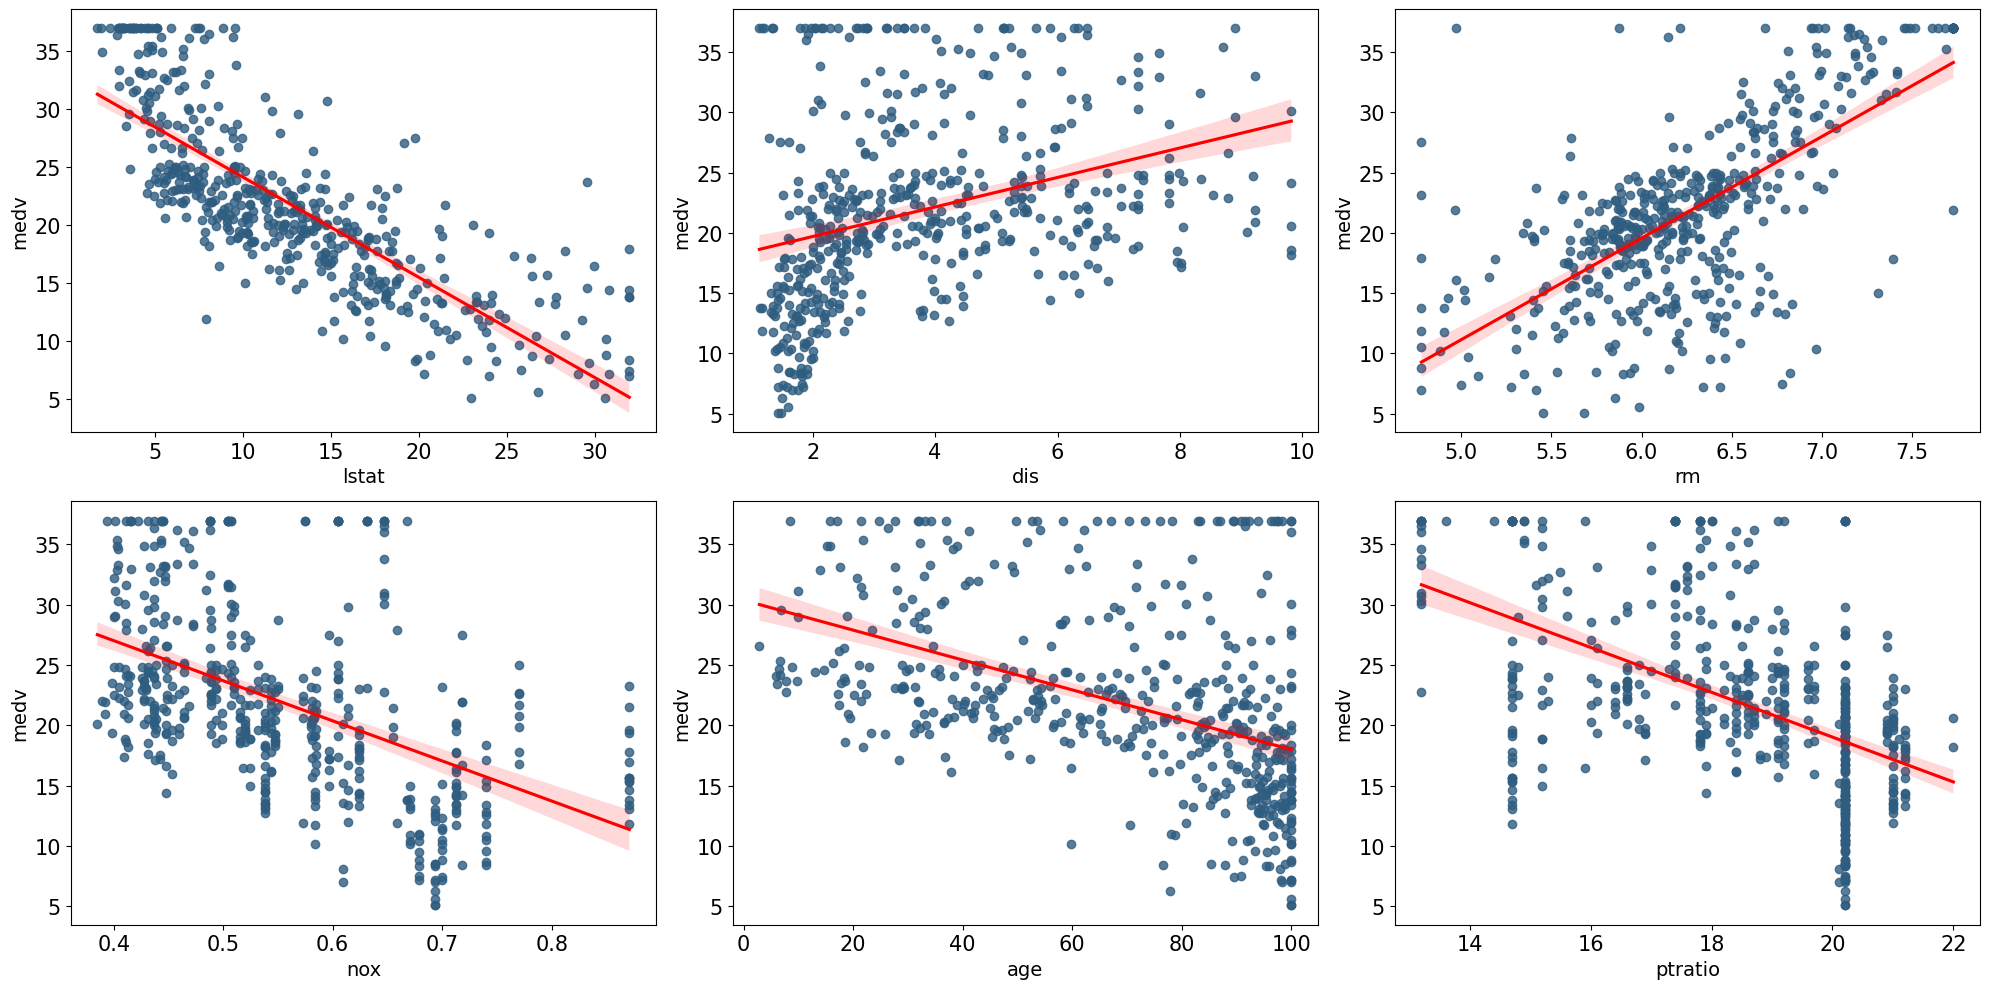

In [38]:
fig,ax = plt.subplots(2,3,figsize=(20,10))
sns.regplot(x=x['lstat'], y=y, scatter_kws={'color': "#2F5D80"}, line_kws={'color': 'red'},ax=ax[0,0])
ax[0,0].set_ylabel("medv",fontsize=14)
ax[0,0].set_xlabel('lstat',fontsize=14)
ax[0,0].tick_params(axis='y', labelsize=15)
ax[0,0].tick_params(axis='x', labelsize=15)

sns.regplot(x=x['dis'], y=y, scatter_kws={'color': "#2F5D80"}, line_kws={'color': 'red'},ax=ax[0,1])
ax[0,1].set_ylabel("medv",fontsize=14)
ax[0,1].set_xlabel('dis',fontsize=14)
ax[0,1].tick_params(axis='y', labelsize=15)
ax[0,1].tick_params(axis='x', labelsize=15)

sns.regplot(x=x['rm'], y=y, scatter_kws={'color': "#2F5D80"}, line_kws={'color': 'red'},ax=ax[0,2])
ax[0,2].set_ylabel("medv",fontsize=14)
ax[0,2].set_xlabel('rm',fontsize=14)
ax[0,2].tick_params(axis='y', labelsize=15)
ax[0,2].tick_params(axis='x', labelsize=15)

sns.regplot(x=x['nox'], y=y, scatter_kws={'color': "#2F5D80"}, line_kws={'color': 'red'},ax=ax[1,0])
ax[1,0].set_ylabel("medv",fontsize=14)
ax[1,0].set_xlabel('nox',fontsize=14)
ax[1,0].tick_params(axis='y', labelsize=15)
ax[1,0].tick_params(axis='x', labelsize=15)

sns.regplot(x=x['age'], y=y, scatter_kws={'color': "#2F5D80"}, line_kws={'color': 'red'},ax=ax[1,1])
ax[1,1].set_ylabel("medv",fontsize=14)
ax[1,1].set_xlabel('age',fontsize=14)
ax[1,1].tick_params(axis='y', labelsize=15)
ax[1,1].tick_params(axis='x', labelsize=15)

sns.regplot(x=x['ptratio'], y=y, scatter_kws={'color': "#2F5D80"}, line_kws={'color': 'red'},ax=ax[1,2])
ax[1,2].set_ylabel("medv",fontsize=14)
ax[1,2].set_xlabel("ptratio",fontsize=14)
ax[1,2].tick_params(axis='y', labelsize=15)
ax[1,2].tick_params(axis='x', labelsize=15)

plt.tight_layout()
plt.show()

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [40]:
x_train.shape

(404, 10)

In [41]:
y_train.shape

(404,)

In [42]:
y_test.shape

(102,)

In [43]:
y_test

array([23.6   , 32.4   , 13.6   , 22.8   , 16.1   , 20.    , 17.8   ,
       14.    , 19.6   , 16.8   , 21.5   , 18.9   ,  7.    , 21.2   ,
       18.5   , 29.8   , 18.8   , 10.2   , 36.9625, 14.1   , 25.2   ,
       29.1   , 12.7   , 22.4   , 14.2   , 13.8   , 20.3   , 14.9   ,
       21.7   , 18.3   , 23.1   , 23.8   , 15.    , 20.8   , 19.1   ,
       19.4   , 34.7   , 19.5   , 24.4   , 23.4   , 19.7   , 28.2   ,
       36.9625, 17.4   , 22.6   , 15.1   , 13.1   , 24.2   , 19.9   ,
       24.    , 18.9   , 35.4   , 15.2   , 26.5   , 36.9625, 21.2   ,
       18.4   , 28.5   , 23.9   , 18.5   , 25.    , 35.4   , 31.5   ,
       20.2   , 24.1   , 20.    , 13.1   , 24.8   , 30.8   , 12.7   ,
       20.    , 23.7   , 10.8   , 20.6   , 20.8   ,  5.0625, 20.1   ,
       36.9625, 10.9   ,  7.    , 20.9   , 17.2   , 20.9   ,  9.7   ,
       19.4   , 29.    , 16.4   , 25.    , 25.    , 17.1   , 23.2   ,
       10.4   , 19.6   , 17.2   , 27.5   , 23.    , 36.9625, 17.9   ,
        9.6   , 17.2

In [44]:
x_test.shape

(102, 10)

In [45]:
x_test

,zn,indus,nox,rm,dis,rad,tax,ptratio,lstat,age
173,0.00,4.05,0.510,6.4160,2.6463,5,296,16.6,9.0400,84.1
274,31.25,6.41,0.447,6.7580,4.0776,4,254,17.6,3.5300,32.9
491,0.00,27.74,0.609,5.9830,1.8681,4,711,20.1,18.0700,98.8
72,0.00,10.81,0.413,6.0650,5.2873,4,305,19.2,5.5200,7.8
452,0.00,18.10,0.713,6.2970,2.3682,24,666,20.2,17.2700,91.8
...,...,...,...,...,...,...,...,...,...,...
412,0.00,18.10,0.597,4.7785,1.5539,24,666,20.2,31.9625,100.0
436,0.00,18.10,0.740,6.4610,2.0026,24,666,20.2,18.0500,93.3
411,0.00,18.10,0.597,6.6570,1.5275,24,666,20.2,21.2200,100.0
86,0.00,4.49,0.449,6.0150,4.4272,3,247,18.5,12.8600,45.1


In [46]:
linear = LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

In [47]:
y_pred = linear.predict(x_test)

In [48]:
scaler = MinMaxScaler()

In [49]:
scaled_train = scaler.fit_transform(x_train)
scaled_test = scaler.transform(x_test)

In [106]:
poly = make_pipeline(PolynomialFeatures(6),Ridge())

In [107]:
poly.fit(scaled_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=6)),
                ('ridge', Ridge())])

In [108]:
y_pred_poly = poly.predict(scaled_test)

In [53]:
linear_model_stats = pd.DataFrame({"Metrics":["x_train,y_train score","x_test,y_test_score","MSE","RSME"],
              "Value":[linear.score(x_train,y_train),linear.score(x_test,y_test),
                       mean_squared_error(y_test,y_pred),r2_score(y_test,y_pred)]})
linear_model_stats

,Metrics,Value
0,"x_train,y_train score",0.777516
1,"x_test,y_test_score",0.755911
2,MSE,11.942030
3,RSME,0.755911


In [113]:
polynomial_stats = pd.DataFrame({"Metrics":["x_train,y_train score","x_test,y_test_score","MSE","RSME"],
                                 "Value":[poly.score(scaled_train,y_train),poly.score(scaled_test,y_test),mean_squared_error(y_test,y_pred_poly),
                                          r2_score(y_test,y_pred_poly)]})
polynomial_stats

,Metrics,Value
0,"x_train,y_train score",0.911166
1,"x_test,y_test_score",0.850077
2,MSE,7.334953
3,RSME,0.850077


In [110]:
x.columns

Index(['zn', 'indus', 'nox', 'rm', 'dis', 'rad', 'tax', 'ptratio', 'lstat',
       'age'],
      dtype='object')